In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go


import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm


import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# description of the data
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Null data checking 
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# missing percentage of the data
missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


In [9]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

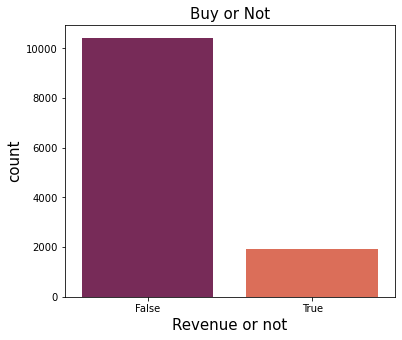

In [10]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'rocket')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [11]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [12]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [13]:
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [14]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [15]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

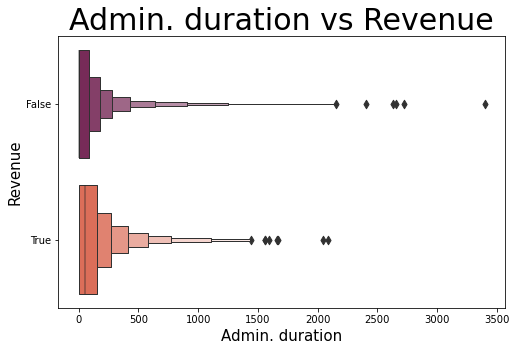

In [16]:
# boxenplot for Administrative duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Administrative_Duration'], data['Revenue'], palette = 'rocket', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

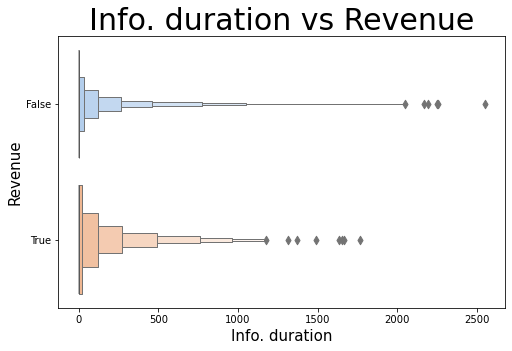

In [17]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['Informational_Duration'], data['Revenue'], palette = 'pastel', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

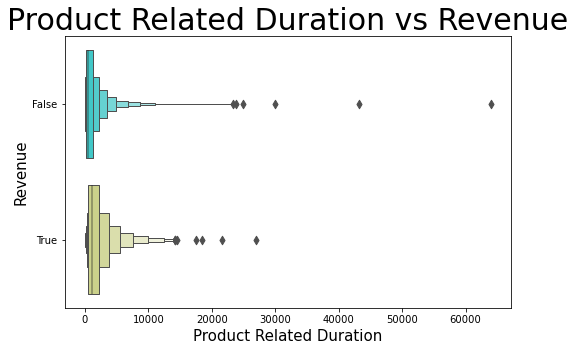

In [18]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ProductRelated_Duration'], data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

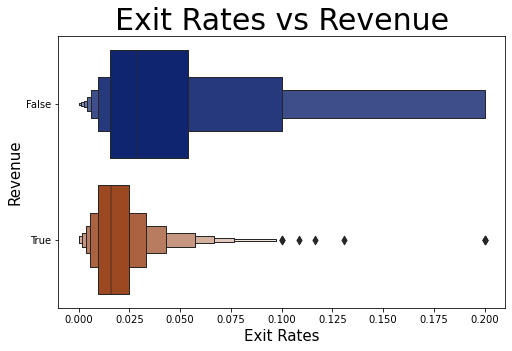

In [19]:
# boxenplot for exit rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(data['ExitRates'], data['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

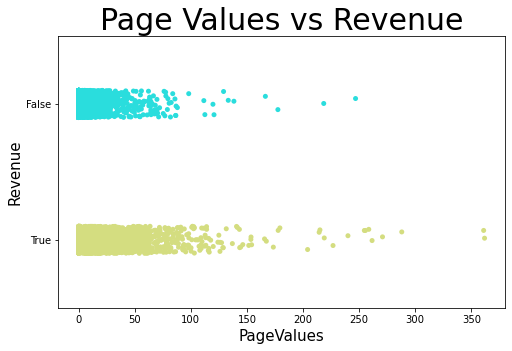

In [20]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['PageValues'], data['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

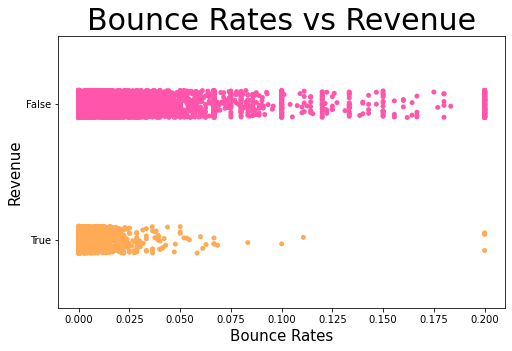

In [21]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(data['BounceRates'], data['Revenue'], palette = 'spring', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

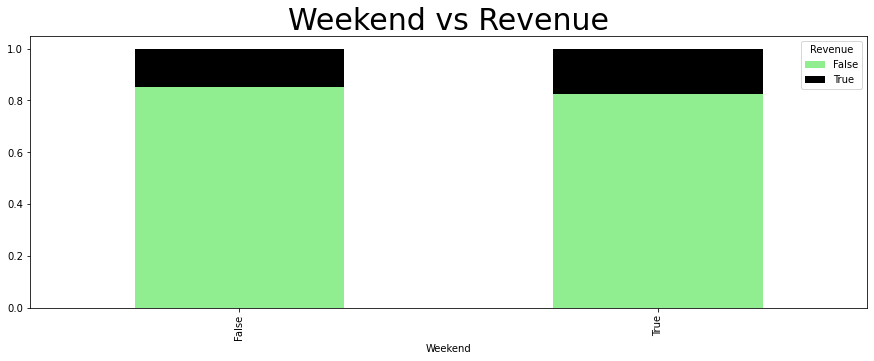

In [34]:
df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'black'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

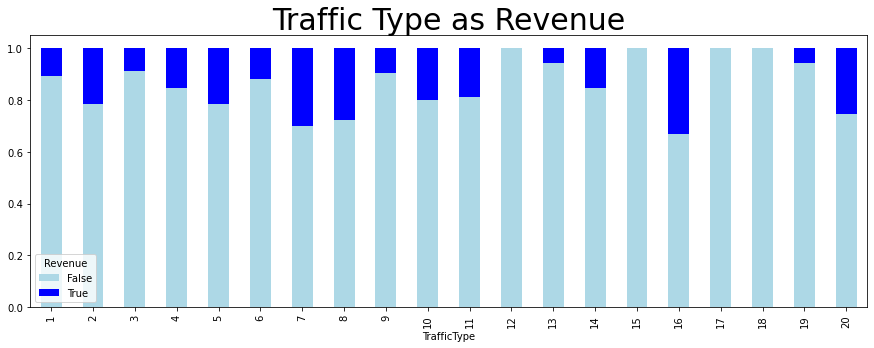

In [22]:
df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

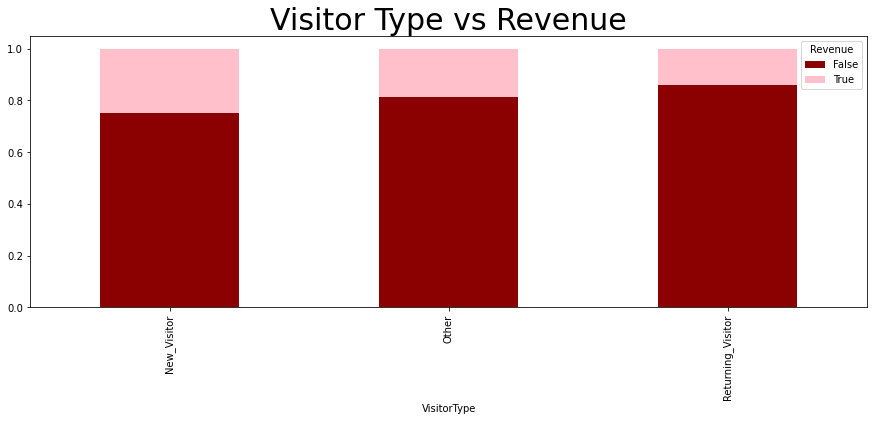

In [35]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['darkred', 'pink'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

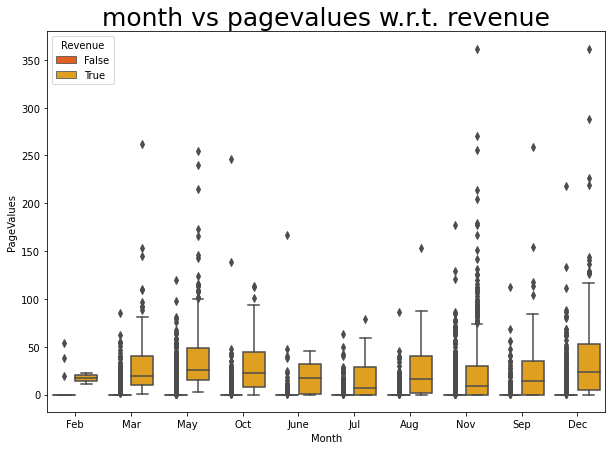

In [24]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'autumn')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

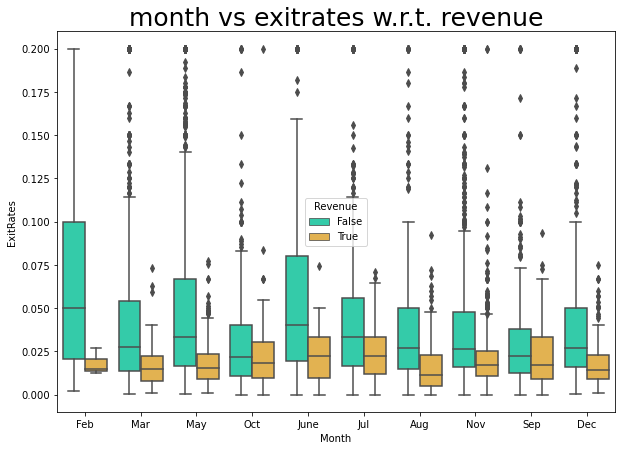

In [25]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'turbo')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()

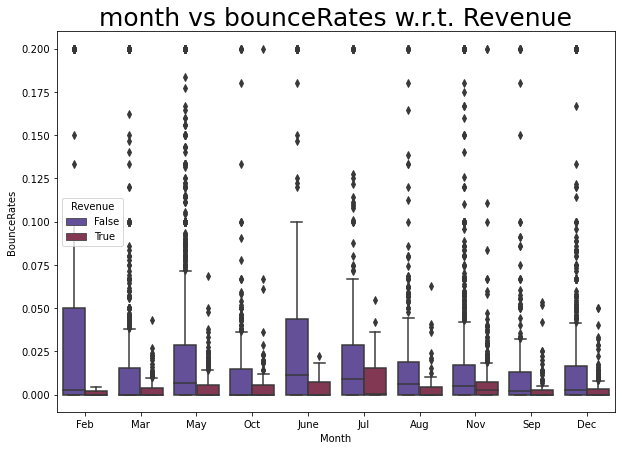

In [26]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'twilight')
plt.title("month vs bounceRates w.r.t. Revenue", fontsize = 25)
plt.show()

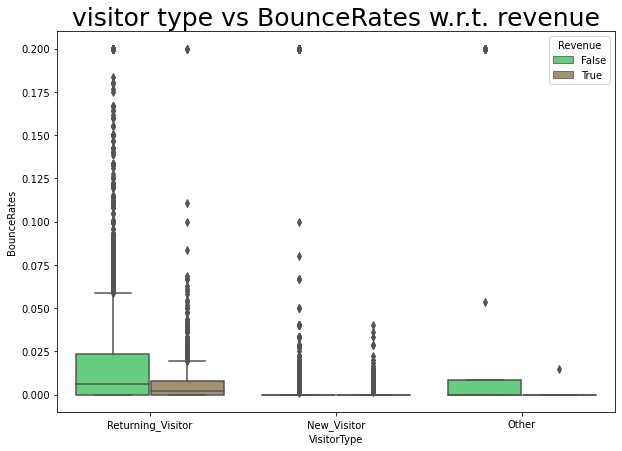

In [27]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'terrain')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 25)
plt.show()

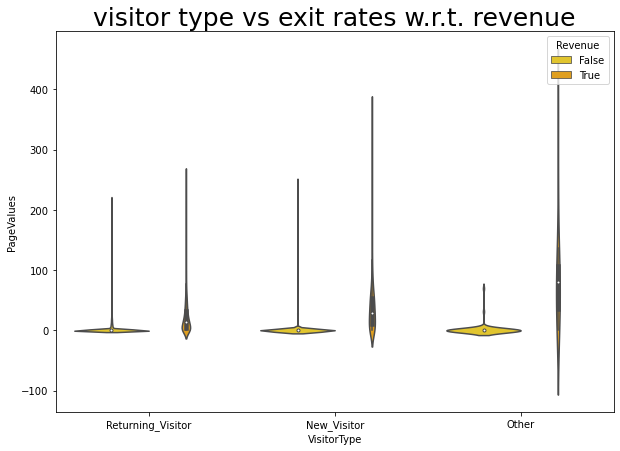

In [28]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'Wistia')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

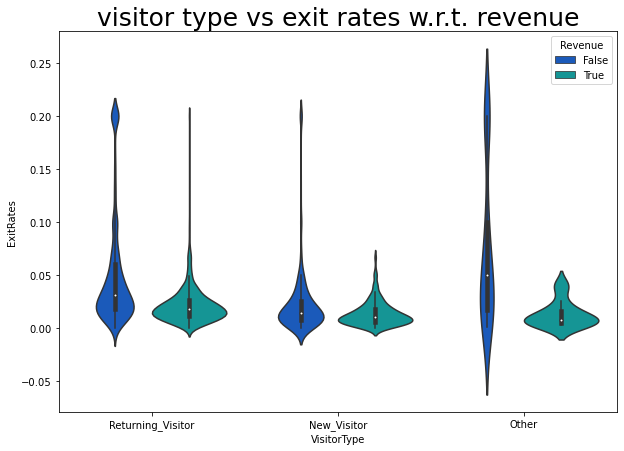

In [29]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'winter')
plt.title('visitor type vs exit rates w.r.t. revenue', fontsize = 25)
plt.show()

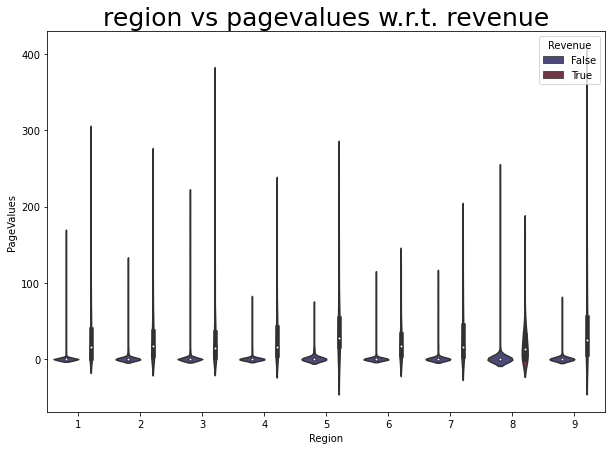

In [31]:
plt.rcParams['figure.figsize'] = (10, 7)

sns.violinplot(x = data ['Region'], y = data['PageValues'], hue = data['Revenue'],palette = 'icefire')
plt.title('region vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

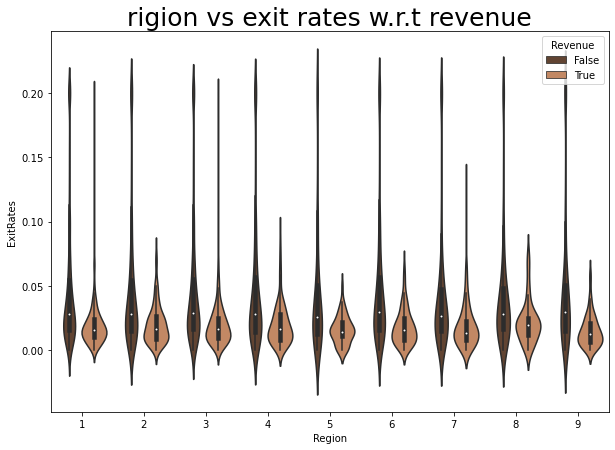

In [32]:
# violin plot for rigion vs exit rates w.r.t revenue
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'copper')
plt.title("rigion vs exit rates w.r.t revenue", fontsize = 25)
plt.show()

<AxesSubplot:>

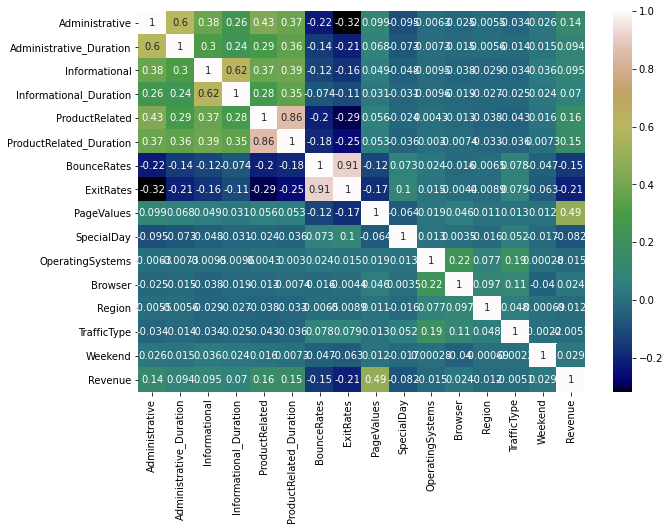

In [33]:
# Correlation Plot
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(data.corr(),annot=True,cmap='gist_earth')

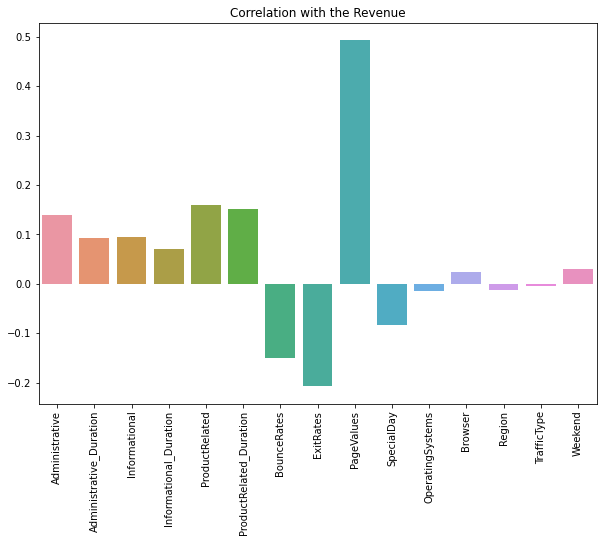

In [34]:
# Correlation with Revenue
data_corr = data.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.show()

# Standardization of data:

In [45]:
data = data.drop(['BounceRates', 'ExitRates', 'SpecialDay',  'OperatingSystems', 'Browser', 'VisitorType', 'Month', 'Region', 'TrafficType', 'Weekend'], axis = 1)

In [46]:
X=data.drop('Revenue',axis=1)
y=data['Revenue']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MODEL BUILDING:-

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

[11:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3115
        True       0.63      0.54      0.59       584

    accuracy                           0.88      3699
   macro avg       0.78      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



In [55]:
# model define and training
model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy: ", model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.9046460433321747
Testing Accuracy:  0.8869964855366316


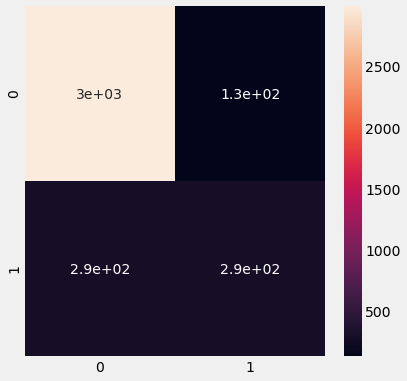

In [56]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)
plt.show()

In [57]:
# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3115
        True       0.70      0.50      0.58       584

    accuracy                           0.89      3699
   macro avg       0.80      0.73      0.76      3699
weighted avg       0.88      0.89      0.88      3699



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3115
        True       0.64      0.53      0.58       584

    accuracy                           0.88      3699
   macro avg       0.78      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.91      0.90      0.91      3115
        True       0.50      0.52      0.51       584

    accuracy                           0.84      3699
   macro avg       0.70      0.71      0.71      3699
weighted avg       0.84      0.84      0.84      3699



In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.91      0.95      0.93      3115
        True       0.64      0.48      0.55       584

    accuracy                           0.88      3699
   macro avg       0.77      0.72      0.74      3699
weighted avg       0.86      0.88      0.87      3699



In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      3115
        True       0.71      0.37      0.48       584

    accuracy                           0.88      3699
   macro avg       0.80      0.67      0.71      3699
weighted avg       0.86      0.88      0.86      3699

